## Implementation of blood view

In [30]:
import os
os.chdir("T:/laupodteam/AIOS/Chontira/CellDynClustering")
import numpy as np
import pandas as pd
from data.load_data import *
from sklearn.mixture import GaussianMixture
from evaluation.util import *
from sklearn.metrics import silhouette_score, davies_bouldin_score
from evaluation.fast_dunn_index import dunn_fast
from graphic_stuffs import *



dm6 = pd.read_feather("data/embedded_celldyn_nn50_ndim6_w_labels.feather")
cell_dyn = pd.read_feather("data/cell_dyn_gender_encoded.feather")


col_reports = ['cluster_assignment','cluster_size','number_people','age', 'gender']
col_c_b = []
for val in cell_dyn.columns:
    if(val.startswith('c_b_')):
        col_c_b.append(val)

dimension_col = ["dim_1","dim_2","dim_3", "dim_4",	"dim_5"	,"dim_6"]

evaluators= {'silhouette_score': silhouette_score,
            'davies_bouldin_score': davies_bouldin_score,
            'dunn_fast': dunn_fast}

<Figure size 2000x1000 with 0 Axes>

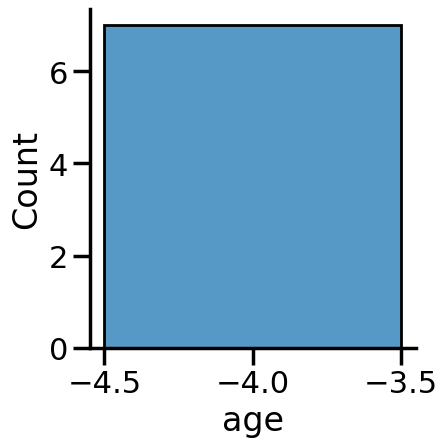

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (20,10))
sns.displot(cell_dyn[cell_dyn.age < 0].age)

## Set-up

In [104]:
## Find the ids of patients for the subsample amount
ids = dm6.loc[np.random.choice(dm6.index, 5000, replace=False),  dm6.columns == 'study_id'].values
ids_list = [id[0] for id in ids]
sub_6 = dm6.loc[dm6['study_id'].isin(ids_list)]
sub_cell = cell_dyn.loc[cell_dyn['studyid_alle_celldyn'].isin(ids_list)]

## Summaries table

In [134]:
summaried_c_b_table = pd.DataFrame(columns=['features', 'averages', 'medians', 'standard_deviation', 'lowest', 'highest'], index = list(range(len(cols))))
cols = ['age']
for val in cell_dyn.columns:
    if(val.startswith('c_b_')):
        cols.append(val)

len(cols)

for i in range(len(cols)):
    summaried_c_b_table.loc[i,summaried_c_b_table.columns == 'features'] = cols[i]
    summaried_c_b_table.loc[i,summaried_c_b_table.columns == 'averages'] = np.mean(cell_dyn[cols[i]].values)
    summaried_c_b_table.loc[i,summaried_c_b_table.columns == 'medians'] = np.median(cell_dyn[cols[i]].values)
    summaried_c_b_table.loc[i,summaried_c_b_table.columns == 'standard_deviation'] = np.std(cell_dyn[cols[i]].values)
    summaried_c_b_table.loc[i,summaried_c_b_table.columns == 'lowest'] = min(cell_dyn[cols[i]].values)
    summaried_c_b_table.loc[i,summaried_c_b_table.columns == 'highest'] = max(cell_dyn[cols[i]].values)

In [136]:
summaried_c_b_table.to_csv("data/summaried_c_b_table.csv", index=False)

## Code for blood view

In [25]:

from colour import Color

def get_sub_sampled_id(data,id_column_name, subsamplesize = 20000):
    
    ids = data.loc[np.random.choice(data.index, subsamplesize, replace=False),  data.columns == id_column_name].values
    ids_list = [id[0] for id in ids]

    return ids_list

def get_unique_id(data,id_column_name, size = 5000):
    
    ids_unique = np.unique(data[id_column_name].values)
    ids_list = [id[0] for id in ids_unique]
    

    return ids_list
    

def assign_cluster_to_data_frame(data, cluster_assignment, save_to_feather = False, file_name=None):
    
    data['cluster_assignment'] = cluster_assignment
    if(save_to_feather and file_name != None):
        data.to_feather(file_name)

    return data

def get_cluster_patient_refence(data, save_to_feather = False, file_name=None):
    
    cluster_to_id = data.loc[:, data.columns.isin(['cluster_assignment','study_id']) ]
    if(save_to_feather and file_name != None):
        cluster_to_id.to_feather(file_name)

    return cluster_to_id

"""
to do 
"""
#def assign_cluster_to_cell_dyn():


def blood_view(data, columns, references, cluster_assignment = None ,save_to_csv = True):
    
    ## colour codes and reference from Jille van der Togt
    red = Color("red")
    colors = list(red.range_to(Color("green"),13))
    colors.reverse()
    
    col_reports = ['cluster_assignment','cluster_size','number_people','age', 'gender']
    
    if(cluster_assignment == None):
        cluster_assignment = data['cluster_assignment'].values

    unique_lables = np.unique(cluster_assignment)

    cluster_resports = pd.DataFrame(columns=col_reports.extend(columns), index=len(unique_lables))
    
    






In [27]:
references = pd.read_excel('data/reference_values.xlsx', index_col=0)
references = references.dropna()
col_c_b = []
for val in cell_dyn.columns:
    if(val.startswith('c_b_')):
        col_c_b.append(val)


ids = get_sub_sampled_id(dm6,'study_id', subsamplesize = 20000)

sub_6 = dm6.loc[dm6['study_id'].isin(ids)]
sub_cell = cell_dyn.loc[cell_dyn['studyid_alle_celldyn'].isin(ids)]

#sub_dm6 =
#blood_view(cell_dyn, col_c_b, references, cluster_assignment = None ,save_to_csv = True)

In [28]:
sub_6

,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,sex,age,study_id,analysis_dt,sample_dt
16,11.455852,4.041632,4.269272,9.540420,10.071600,4.082326,M,43,4.786218e+08,2005-09-14 05:51:09,2005-09-14 06:00:00
19,12.329915,3.862851,3.345723,9.392938,12.818466,4.798128,F,55,4.846009e+09,2005-09-14 05:59:22,2005-09-14 06:00:00
20,10.032048,4.490374,4.085389,9.206880,10.864103,3.967758,F,45,7.287054e+08,2005-09-14 05:59:59,2005-09-14 06:00:00
22,12.397266,4.003212,3.427686,9.265847,12.431635,4.910236,M,83,6.005379e+09,2005-09-14 06:01:50,2005-09-14 06:00:00
23,10.553869,3.353245,4.332078,9.497571,9.968741,4.141337,M,64,5.990427e+09,2005-09-14 06:02:27,2005-09-14 06:00:00
...,...,...,...,...,...,...,...,...,...,...,...
2241466,9.680050,3.735110,5.628319,8.400567,8.350163,3.235285,M,60,1.084647e+09,2015-09-22 13:04:30,2015-09-22 09:10:00
2241468,10.931108,5.108624,5.381967,7.727590,10.943086,3.620903,M,2,6.545444e+09,2015-09-24 09:00:01,2015-09-24 08:24:00
2241471,12.672380,4.364646,4.950053,8.285803,9.584893,4.195634,M,42,6.324194e+09,2015-09-24 09:30:48,2015-09-24 08:00:00
2241478,12.695323,4.346445,4.939010,8.200343,9.670081,4.268613,M,71,1.679614e+09,2015-10-23 10:17:27,2015-10-23 07:00:00
